In [ ]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split
import os

from settings.constants import TRAIN_CSV, VAL_CSV 

df = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Age': np.float64})

train_df, val_df = train_test_split(
     df,
     test_size=0.2,
     stratify=df["Survived"],  
     random_state=42
)

train_df.to_csv(TRAIN_CSV, index=False)
val_df.to_csv(VAL_CSV, index=False)
"""

In [2]:
import numpy as np
import re as re
import pandas as pd

from settings.constants import TRAIN_CSV, VAL_CSV 

train = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Age': np.float64})
val  = pd.read_csv(VAL_CSV , header = 0, dtype={'Age': np.float64})
full_data = [train, val]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
1,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
2,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
3,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
4,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S


In [ ]:
train.columns

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()


In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean()


In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()


In [ ]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


In [ ]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

In [ ]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

In [ ]:
age_avg = train['Age'].mean()
age_std = train['Age'].std()    
age_null_count = train['Age'].isnull().sum()
    
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

In [ ]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)

pd.crosstab(train['Title'], train['Sex'])

In [ ]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [ ]:
"""
from sklearn.preprocessing import LabelEncoder

# encode labels
le = LabelEncoder()

le.fit(train['Sex'])
train['Sex'] = le.transform(train['Sex'])

le.fit(train['Title'])
train['Title'] = le.transform(train['Title'])

le.fit(train['Embarked'].values)
train['Embarked'] = le.transform(train['Embarked'].values)

le.fit(train['Fare'])
train['Fare'] = le.transform(train['Fare'])

le.fit(train['Age'])
train['Age'] = le.transform(train['Age'])
"""

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train['Sex'])
train['Sex'] = le.transform(train['Sex'])

train.columns

In [4]:
from utils.dataloader import DataLoader

X_raw = train.drop("Survived", axis=1)

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = train["Survived"]

F:\Python\dru-final-proj\app\utils\dataloader.py:45: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list
F:\Python\dru-final-proj\app\utils\dataloader.py:45: SettingWithCopy

,Classifier,Accuracy
0,KNeighborsClassifier,0.801389
1,SVC,0.818056
2,DecisionTreeClassifier,0.806944
3,RandomForestClassifier,0.800000
4,AdaBoostClassifier,0.809722
5,GradientBoostingClassifier,0.808333
6,GaussianNB,0.766667
7,LinearDiscriminantAnalysis,0.795833
8,QuadraticDiscriminantAnalysis,0.805556
9,LogisticRegression,0.801389


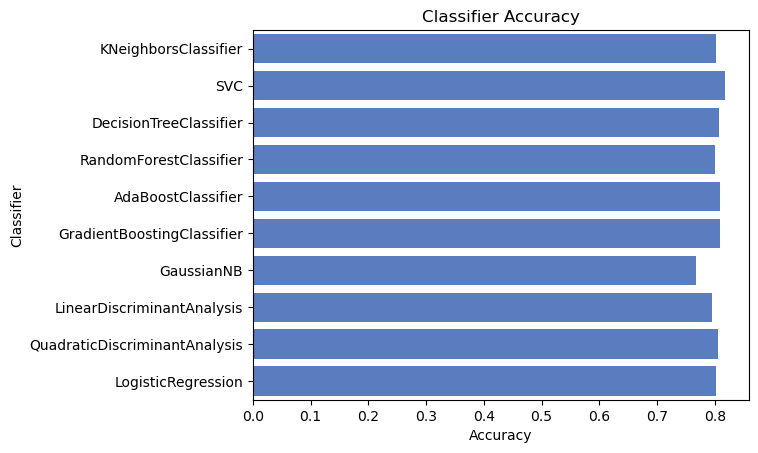

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

# Some method have been deprecated, so code should be changed 
log_entries = []

for clf in acc_dict:
    acc_dict[clf] /= 10.0
    log_entries.append([clf, acc_dict[clf]])

log = pd.DataFrame(log_entries, columns=log_cols)
# Ends here 

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "b")
log

In [6]:
import pickle
import json
import pandas as pd
from sklearn.svm import SVC
from os import getcwd

from utils.dataloader import DataLoader 
from settings.constants import TRAIN_CSV


with open('settings/specifications.json') as f:
    specifications = json.load(f)

raw_train = pd.read_csv(TRAIN_CSV)
x_columns = specifications['description']['X']
y_column = specifications['description']['y']

X_raw = raw_train[x_columns]

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = raw_train.Survived

model = SVC()
model.fit(X, y)
with open(getcwd() + '/models/SVC.pickle', 'wb')as f:
    pickle.dump(model, f)

F:\Python\dru-final-proj\app\utils\dataloader.py:45: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list
F:\Python\dru-final-proj\app\utils\dataloader.py:45: SettingWithCopy

In [7]:
import pickle
import json
import pandas as pd
from sklearn.svm import SVC

from utils.dataloader import DataLoader 
from settings. constants import VAL_CSV


with open('settings/specifications.json') as f:
    specifications = json.load(f)

x_columns = specifications['description']['X']
y_column = specifications['description']['y']

raw_val = pd.read_csv(VAL_CSV)
x_raw = raw_val[x_columns]

loader = DataLoader()
loader.fit(x_raw)
X = loader.load_data()
y = raw_val.Survived

loaded_model = pickle.load(open(getcwd() + '/models/SVC.pickle', 'rb'))
loaded_model.score(X, y)

F:\Python\dru-final-proj\app\utils\dataloader.py:45: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.dataset['Age'][np.isnan(self.dataset['Age'])] = age_null_random_list
F:\Python\dru-final-proj\app\utils\dataloader.py:45: SettingWithCopy

0.8044692737430168